In [13]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [14]:
def fit_lowess_spline(x, y, frac=0.67, return_error=False, percentile_top=80, percentile_bottom=20):
    # From https://james-brennan.github.io/posts/lowess_conf/
    from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess

    def smooth(x, y, xgrid, frac=0.67):
        samples = np.random.choice(len(x), 50, replace=True)
        y_s = y[samples]
        x_s = x[samples]
        y_sm = sm_lowess(y_s, x_s, frac=frac, it=5,
                         return_sorted=False)
        # regularly sample it onto the grid
        y_grid = scipy.interpolate.interp1d(x_s, y_sm,
                                            fill_value='extrapolate')(xgrid)
        return y_grid

    if not return_error:
        sm_x, sm_y = sm_lowess(y, x, frac=frac, return_sorted=True).T
        return sm_x, sm_y
    elif return_error:
        xgrid = np.linspace(x.min(), x.max())
        K = 100
        smooths = np.stack([smooth(x, y, xgrid, frac=frac) for k in range(K)]).T

        mean = np.nanmean(smooths, axis=1)
        #         median = np.nanmedian(smooths, axis=1)
        q_top = np.nanpercentile(smooths, percentile_top, axis=1)
        q_bot = np.nanpercentile(smooths, percentile_bottom, axis=1)

        return xgrid, mean, q_bot, q_top

## Southern

In [2]:
df = pd.read_csv("southern_burnin_intensity_endpoints.csv")

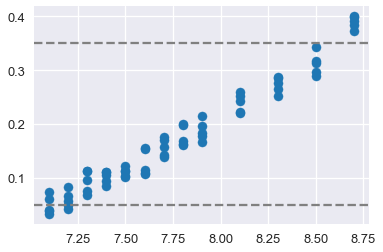

In [3]:
plt.scatter(df["hab"], df["pfpr2_10"])
plt.axhline(0.05, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.35, linestyle='dashed', color='gray')

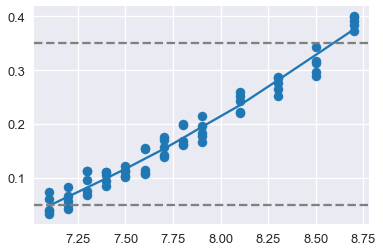

In [6]:
x,y = df["hab"], df["pfpr2_10"]
xs,ys = fit_lowess_spline(x,y)
plt.scatter(df["hab"], df["pfpr2_10"])
plt.plot(xs,ys)
plt.axhline(0.05, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.35, linestyle='dashed', color='gray')

In [10]:
southern_interp = np.interp([0.05,0.15,0.25,0.35],ys,xs)

In [11]:
print(southern_interp)

array([7.10894572, 7.6808631 , 8.16606932, 8.59169366])

In [10]:
burnin_southern_master_df = pd.DataFrame({
    "archetype": "Southern",
    "approximate_pfpr2_10": [0.05,0.15,0.25,0.35],
    "habitat_scale": [7.1,7.7,8.2,8.6],
    "exp_id": "ae162b7e-1f8f-eb11-a2ce-c4346bcb1550",
    "sim_id": ["7eaf9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "7faf9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "80af9a84-1f8f-eb11-a2ce-c4346bcb1550",
              "82af9a84-1f8f-eb11-a2ce-c4346bcb1550"],
    "path": ["\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1d8\\3e6\\8a1\\1d83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1e8\\3e6\\8a1\\1e83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\1f8\\3e6\\8a1\\1f83e68a-1f8f-eb11-a2ce-c4346bcb1550",
            "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_southern_burnins_final_20210327_171247\\218\\3e6\\8a1\\2183e68a-1f8f-eb11-a2ce-c4346bcb1550"]
})

## Sahel

In [4]:
df = pd.read_csv("sahel_burnin_intensity_endpoints.csv")

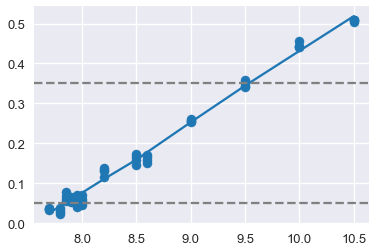

In [5]:
x,y = df["hab"], df["pfpr2_10"]
xs,ys = fit_lowess_spline(x,y)
plt.scatter(df["hab"], df["pfpr2_10"])
plt.plot(xs,ys)
plt.axhline(0.05, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.35, linestyle='dashed', color='gray')

In [6]:
sahel_interp = np.interp([0.05,0.15,0.25,0.35],ys,xs)

In [7]:
print(sahel_interp)

[7.84625892 8.44307033 8.98425254 9.5320145 ]


In [9]:
df

,hab,eir,pfpr2_10
0,10.50,607.462409,0.509414
1,10.50,534.639727,0.508147
2,10.50,538.401654,0.503824
3,10.50,583.783753,0.508343
4,10.00,214.651573,0.456637
5,10.00,165.890187,0.440189
6,10.00,194.725801,0.440513
7,10.00,182.352058,0.443598
8,9.50,63.142316,0.350388
9,9.50,62.926894,0.341564


In [12]:
burnin_sahel_master_df = pd.DataFrame({
    "archetype": "Sahel",
    "approximate_pfpr2_10": [0.05,0.15,0.25,0.35],
    "habitat_scale": [7.85,8.5,9.0,9.5],
    "exp_id": ["28b150c1-f492-eb11-a2ce-c4346bcb1550",
              "a41082e1-a592-eb11-a2ce-c4346bcb1550",
              "06818a2f-7192-eb11-a2ce-c4346bcb1550",
              "06818a2f-7192-eb11-a2ce-c4346bcb1550"],
    "sim_id": ["29b150c1-f492-eb11-a2ce-c4346bcb1550",
              "a61082e1-a592-eb11-a2ce-c4346bcb1550",
              "f16b8c35-7192-eb11-a2ce-c4346bcb1550",
              "f26b8c35-7192-eb11-a2ce-c4346bcb1550"],
    "path": [
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_sahel_burnins_v1_extra_20210401_141657\\aa7\\7ed\\cef\\aa77edce-f492-eb11-a2ce-c4346bcb1550",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_sahel_burnins_v1_extra_20210401_045220\\de4\\2a4\\eba\\de42a4eb-a592-eb11-a2ce-c4346bcb1550",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_sahel_burnins_v1_20210331_223509\\f76\\b8c\\357\\f76b8c35-7192-eb11-a2ce-c4346bcb1550",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_sahel_burnins_v1_20210331_223509\\016\\c8c\\357\\016c8c35-7192-eb11-a2ce-c4346bcb1550"    
    ]
})

In [13]:
burnin_master_df = pd.concat([burnin_southern_master_df, burnin_sahel_master_df], ignore_index=True)
burnin_master_df.to_csv("../burnins.csv", index=False)

### Central

In [3]:
df = pd.read_csv("central_burnin_intensity_endpoints.csv")

In [9]:
df_pfpr_eir = pd.read_csv("pfpr_eir_empirical.csv")

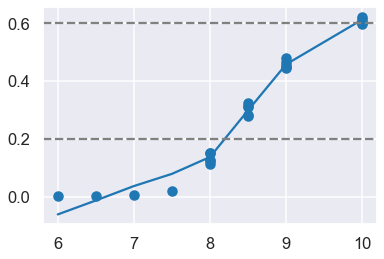

In [4]:
x,y = df["hab"], df["pfpr2_10"]
xs,ys = fit_lowess_spline(x,y)
plt.scatter(df["hab"], df["pfpr2_10"])
plt.plot(xs,ys)
plt.axhline(0.2, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.6, linestyle='dashed', color='gray')

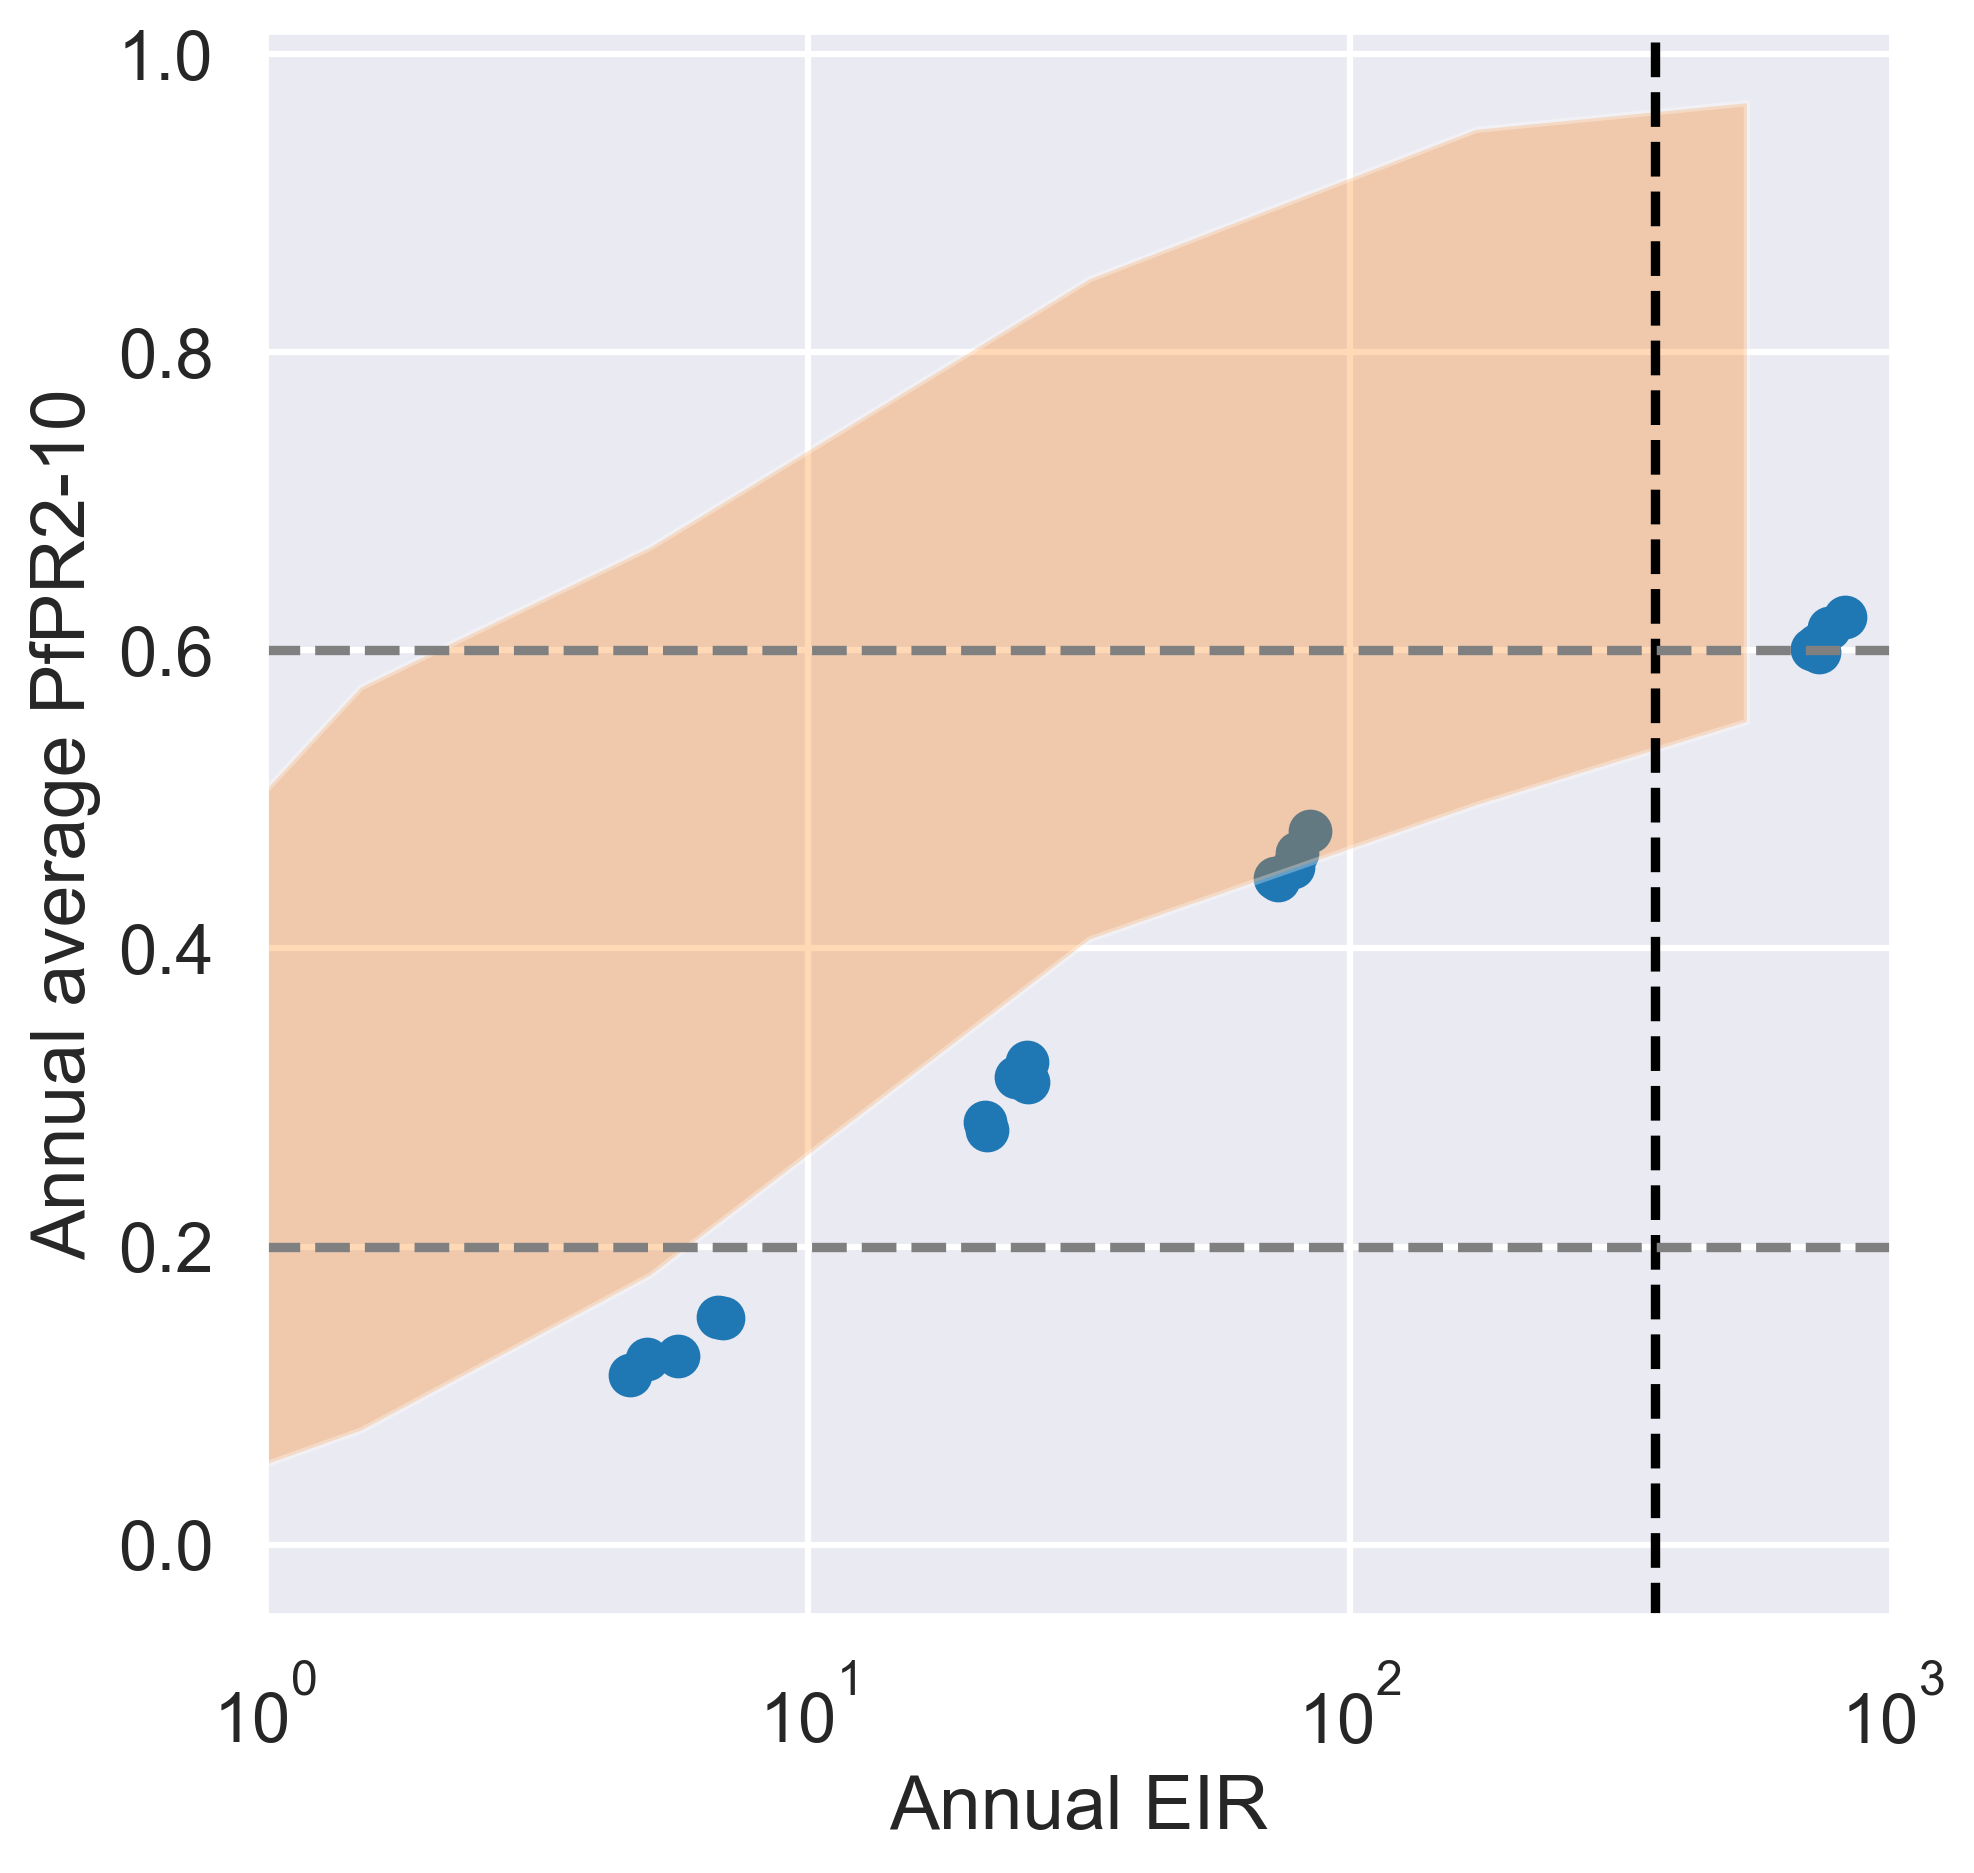

In [11]:
plt.figure(figsize=(7,7), dpi=300)
x,y = df["eir"], df["pfpr2_10"]
xs,ys = fit_lowess_spline(x,y)
plt.scatter(x,y)
plt.xscale("log")
plt.axvline(365, linestyle='dashed', color='black')
plt.xlim([1,1000])
plt.axhline(0.2, linestyle='dashed', color='gray') #observed range for Zambia
plt.axhline(0.6, linestyle='dashed', color='gray')
plt.xlabel("Annual EIR")
plt.ylabel("Annual average PfPR2-10")

plt.fill_between(10**df_pfpr_eir["log10_eir"], df_pfpr_eir["pfpr_min"], df_pfpr_eir["pfpr_max"], alpha=0.3)

In [12]:
burnin_central_master_df = pd.DataFrame({
    "archetype": "Central",
    "approximate_pfpr2_10": [0.2,0.3,0.4,0.45,0.5,0.6],
    "habitat_scale": [8.1,8.4,8.7,9.0,9.3,9.5],
    "exp_id": ["23b4caab-c9a9-eb11-a2e3-c4346bcb7275",
                "23b4caab-c9a9-eb11-a2e3-c4346bcb7275",
                "23b4caab-c9a9-eb11-a2e3-c4346bcb7275",
                "63b1cb7a-31a9-eb11-a2e3-c4346bcb7275",
                "23b4caab-c9a9-eb11-a2e3-c4346bcb7275",
                "23b4caab-c9a9-eb11-a2e3-c4346bcb7275"],
    "sim_id": ["46315bb6-c9a9-eb11-a2e3-c4346bcb7275",
            "43315bb6-c9a9-eb11-a2e3-c4346bcb7275",
            "3e315bb6-c9a9-eb11-a2e3-c4346bcb7275",
            "6ab1cb7a-31a9-eb11-a2e3-c4346bcb7275",
            "3c315bb6-c9a9-eb11-a2e3-c4346bcb7275",
            "39315bb6-c9a9-eb11-a2e3-c4346bcb7275"],
    "path": [
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_additional_20210430_153643\\0a8\\ac9\\c4c\\0a8ac9c4-c9a9-eb11-a2e3-c4346bcb7275",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_additional_20210430_153643\\0d8\\ac9\\c4c\\0d8ac9c4-c9a9-eb11-a2e3-c4346bcb7275",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_additional_20210430_153643\\158\\ac9\\c4c\\158ac9c4-c9a9-eb11-a2e3-c4346bcb7275",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_20210429_212716\\887\\c08\\873\\887c0887-31a9-eb11-a2e3-c4346bcb7275",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_additional_20210430_153643\\248\\ac9\\c4c\\248ac9c4-c9a9-eb11-a2e3-c4346bcb7275",
        "\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\sac_ipt_central_burnins_additional_20210430_153643\\318\\ac9\\c4c\\318ac9c4-c9a9-eb11-a2e3-c4346bcb7275" 
    ]
})

In [15]:
burnin_master_df = pd.read_csv("../burnins.csv")

In [17]:
burnin_master_df_new = pd.concat([burnin_master_df, burnin_central_master_df], ignore_index=True)

In [18]:
burnin_master_df_new

,archetype,approximate_pfpr2_10,habitat_scale,exp_id,sim_id,path
0,Southern,0.05,7.10,ae162b7e-1f8f-eb11-a2ce-c4346bcb1550,7eaf9a84-1f8f-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
1,Southern,0.15,7.70,ae162b7e-1f8f-eb11-a2ce-c4346bcb1550,7faf9a84-1f8f-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
2,Southern,0.25,8.20,ae162b7e-1f8f-eb11-a2ce-c4346bcb1550,80af9a84-1f8f-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
3,Southern,0.35,8.60,ae162b7e-1f8f-eb11-a2ce-c4346bcb1550,82af9a84-1f8f-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
4,Sahel,0.05,7.85,28b150c1-f492-eb11-a2ce-c4346bcb1550,29b150c1-f492-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
5,Sahel,0.15,8.50,a41082e1-a592-eb11-a2ce-c4346bcb1550,a61082e1-a592-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
6,Sahel,0.25,9.00,06818a2f-7192-eb11-a2ce-c4346bcb1550,f16b8c35-7192-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
7,Sahel,0.35,9.50,06818a2f-7192-eb11-a2ce-c4346bcb1550,f26b8c35-7192-eb11-a2ce-c4346bcb1550,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
8,Central,0.20,8.10,23b4caab-c9a9-eb11-a2e3-c4346bcb7275,46315bb6-c9a9-eb11-a2e3-c4346bcb7275,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...
9,Central,0.30,8.40,23b4caab-c9a9-eb11-a2e3-c4346bcb7275,43315bb6-c9a9-eb11-a2e3-c4346bcb7275,\\internal.idm.ctr\IDM\Home\jsuresh\output\sac...


In [20]:
burnin_master_df_new.to_csv("../burnins.csv", index=False)